<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#概要" data-toc-modified-id="概要-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>概要</a></span></li><li><span><a href="#教材サイト" data-toc-modified-id="教材サイト-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>教材サイト</a></span><ul class="toc-item"><li><span><a href="#検定手法のリストアップ" data-toc-modified-id="検定手法のリストアップ-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>検定手法のリストアップ</a></span></li></ul></li><li><span><a href="#実験" data-toc-modified-id="実験-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>実験</a></span><ul class="toc-item"><li><span><a href="#welchのt検定" data-toc-modified-id="welchのt検定-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>welchのt検定</a></span></li></ul></li><li><span><a href="#二項検定" data-toc-modified-id="二項検定-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>二項検定</a></span></li><li><span><a href="#カイ２乗検定" data-toc-modified-id="カイ２乗検定-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>カイ２乗検定</a></span></li><li><span><a href="#F検定：分散の検定" data-toc-modified-id="F検定：分散の検定-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>F検定：分散の検定</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#サンプル数を増やすとどうなるか" data-toc-modified-id="サンプル数を増やすとどうなるか-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>サンプル数を増やすとどうなるか</a></span></li></ul></li></ul></li></ul></div>

# 概要
広告やキャンペーン効果測定の方法についてまとめる。  
繰り返し使いまわせるような体系化された内容にしよう。

# 教材サイト

A/Bテストに用いられれる統計的検定手法（ロジック）のまとめ＆比較 | RCO Ad-Tech Lab Blog  
https://www.rco.recruit.co.jp/career/engineer/blog/ab-test-logic/

仮説検証とサンプルサイズの基礎 - クックパッド開発者ブログ
https://techlife.cookpad.com/entry/2016/09/26/111601


長文であるが、統計的仮説検定の盲点について考察している。  
観測結果を鵜呑みにしないための視点が記されている。
http://id.fnshr.info/2014/12/17/stats-done-wrong-05/


## 検定手法のリストアップ

1. **二項検定**
    クリック数（コンバージョン率）常に使える。
    理論的に厳密。フィッシャーの正確確率検定に対して、”戻しの処理”を加えたもの。復元抽出。
    
2. **カイ二乗検定**  
   クリック数（コンバージョン率）のサンプルサイズが大きい場合（＞O(10)）に使える。
   二項検定において、分布（二項分布）をサンプルサイズが大きい極限において正規分布で近似（中心極限定理）
   
3. **フィッシャーの正確確率検定**
    クリック数（コンバージョン率）に対して常に使える。
    理論的に厳密。二項検定とは違い、抽出したサンプルを戻さないと考える。非復元抽出。
    
4.  **t検定**  
    クリック数（コンバージョン率）や売上等の連続的な数値に使える。  
    クリック数の場合：サンプルサイズが大きいこと、  
    連続数値の場合：分布が正規分布 or サンプルサイズが大きいことが使用条件になる。
    
    クリック数の場合：サンプルサイズが大きい極限において正規分布で近似（中心極限定理）  
    連続数値の場合：平均値に差があるか否かの検定
    
5. **ウィルコクソンの順位和検定**  
   売上等の連続的な数値に使う。サンプルサイズが大きいことが使用条件で、中央値に差があるか否かの検定に使う。
   

# 実験
以下の条件で実験をする。  

* 施策A:改善案
    コンバージョンした=454
    コンバージョンせず=20,933
    
* 施策B：現状維持
    コンバージョンした=189
    コンバージョンせず=10,845

In [2]:
from scipy import stats
from scipy.stats import t

In [8]:
sample_a = [1] * 454 + [0] * 20933
sample_b = [1] * 189 + [0] * 10845

In [9]:
mean_a = np.mean(sample_a)
std_a = np.std(sample_a, ddof=1)

## welchのt検定
二つの集団が同じ分散を持つことは保障されない。そんなときは、welchのt検定を使うべきである。  
```ttest_ind()```関数の引数 ```equal_var=False``` とすれば、welchのt検定を実施する。

welchのt検定は、以下の条件が当てはまるときに実施する。  
>・2群間の平均値の差を比較する検定  
・2群間の平均値が独立であり(データに対応がない)、2群間に等分散性が仮定できない場合に用いる
https://qiita.com/suaaa7/items/745ac1ca0a8d6753cf60#welch%E3%82%A6%E3%82%A7%E3%83%AB%E3%83%81%E3%81%AEt%E6%A4%9C%E5%AE%9A

https://qiita.com/ynakayama/items/b9ec31a296de48e62863  
http://lang.sist.chukyo-u.ac.jp/classes/PythonProbStat/Python-statistics5.html

In [14]:
# 各ユーザーごとにコンバージョンする/しないは１票とみなすと equql_val=False とすべき。
t_value, p_value = stats.ttest_ind(sample_a, sample_b, equal_var=False)


In [13]:
print("p値={}".format(p_value))

p値=0.009499486517327413


# 二項検定

In [29]:
stats.binom_test(x=454, n=(454+20933), p=(189)/(10845)*1.0, alternative='two-sided')

3.6206495804123572e-05

In [28]:
454/(454+189)*1.0

0.7060653188180405

In [17]:
import scipy.stats
import numpy as np
data = np.matrix([ [ 454, 20933 ], [ 189, 10845 ] ])
p_a = np.sum(data, axis=1).item((0, 0)) / data.sum()
print("p_a=", p_a)
conversion_total = np.sum(data, axis=0).item(0, 0)
print("conversion_total=", conversion_total)
conversion_a  = data.item(0,0)
print("conversion_a=", conversion_a)
# 確率 p_a の基で、n回試行して、x回 (Aは)yesになった
p_value = scipy.stats.binom_test(x=conversion_a, n=conversion_total, p=p_a, alternative="two-sided")
print("p_value=", p_value)

p_a= 0.659665031924
conversion_total= 643
conversion_a= 454
p_value= 0.0125320280817


In [25]:
conversion_a

454

In [26]:
conversion_total

643

In [27]:
p_a

0.65966503192375314

# カイ２乗検定

In [30]:
import scipy.stats
import numpy as np
data = np.matrix([ [ 454, 20933 ], [ 189, 10845 ] ])
chi2, p, ddof, expected = scipy.stats.chi2_contingency( data , correction=False)
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 6.291035173658824
p-value: 0.012135015711322547
Degrees of Freedom: 1

[[   424.16461553  20962.83538447]
 [   218.83538447  10815.16461553]]


# F検定：分散の検定
F検定は、二つの集団の分散が等しいかどうか判定するための検定である。  

In [36]:
# サンプル実装
# http://toukei.link/programmingandsoftware/statistics_by_python/ftest_for_homoscedasticity/
import numpy as np
import scipy 
import statistics as stat

# 日本人男性30人をサンプル
np.random.seed(1)
Japan = np.round([np.random.normal(171, 6, 30)],1).reshape(30)
print("Japan:{}".format(Japan))

# アメリカ人男性30人をサンプル
np.random.seed(1)
US = np.round([np.random.normal(180, 8, 30)],1).reshape(30)
print("US:{}".format(US)) 

Japan:[ 180.7  167.3  167.8  164.6  176.2  157.2  181.5  166.4  172.9  169.5
  179.8  158.6  169.1  168.7  177.8  164.4  170.   165.7  171.3  174.5
  164.4  177.9  176.4  174.   176.4  166.9  170.3  165.4  169.4  174.2]
US:[ 193.   175.1  175.8  171.4  186.9  161.6  194.   173.9  182.6  178.
  191.7  163.5  177.4  176.9  189.1  171.2  178.6  173.   180.3  184.7
  171.2  189.2  187.2  184.   187.2  174.5  179.   172.5  177.9  184.2]


標本分散を確認する。  
一見すると、JapanとUSの分散の違いは明らかであるように見える。

In [38]:
# 標本分散
print("var(Japan)={}".format(stat.variance(Japan)))
print("var(US)={}".format(stat.variance(US)))

var(Japan)=37.972195402298865
var(US)=67.51889655172411


だが、```scipy.stats.bartlett``` を使い、F検定を実施すると、p値が ```0.126978``` と高い値であり、
帰無仮説：JapanとUSの分散は等しいを否定することができないことがわかる。  

In [39]:
# 等分散性の検定を行う。
scipy.stats.bartlett(Japan,US)

BartlettResult(statistic=2.3290558523567992, pvalue=0.1269788727635183)

### サンプル数を増やすとどうなるか
先の例では、Japan,USともに30件のサンプルで、等分散検定をしていた。  
正規乱数を発生させる際の標準偏差は、Japan=6, US=8 である。  
サンプル数を増やすと、案の定、p値は十分小さくなった。  

In [41]:
sample_size = 1000

# 日本人男性サンプル
np.random.seed(1)
Japan = np.round([np.random.normal(171, 6, sample_size)],1).reshape(sample_size)
#print("Japan:{}".format(Japan))

# アメリカ人男性サンプル
np.random.seed(1)
US = np.round([np.random.normal(180, 8, sample_size)],1).reshape(sample_size)
#print("US:{}".format(US)) 

# 標本分散
print("var(Japan)={}".format(stat.variance(Japan)))
print("var(US)={}".format(stat.variance(US)))

# 等分散性の検定を行う。
scipy.stats.bartlett(Japan,US)

var(Japan)=34.6923696096096
var(US)=61.654450360360364


BartlettResult(statistic=81.426932773949389, pvalue=1.8186256004148035e-19)

生成するサンプル数を変えながら、p値の変化を調べるとしよう。  
すると、サンプル数が50件になると、「たまたま分散が一緒になった確率が 5％を切る」ため、分散は同じという仮説を棄却することができるようになる。

100%|████████████████████████████████████████| 90/90 [00:00<00:00, 1874.81it/s]


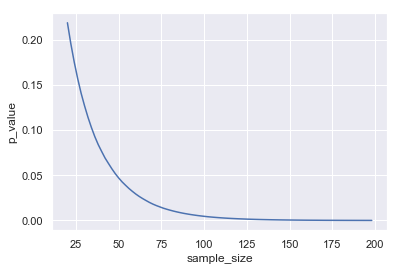

In [59]:
%matplotlib inline
import seaborn as sns
import pandas as pd
from tqdm import tqdm_notebook,tqdm
plot_buff = []
for _sample_size in tqdm(range(20,200,2)):

    # 日本人男性サンプル
    np.random.seed(1)
    Japan = np.round([np.random.normal(171, 6, _sample_size)],1).reshape(_sample_size)

    # アメリカ人男性サンプル
    np.random.seed(1)
    US = np.round([np.random.normal(180, 8, _sample_size)],1).reshape(_sample_size)

    # 等分散性の検定を行う。
    _result = scipy.stats.bartlett(Japan,US)
    
    if False:
        print("Sample Size:{}".format(_sample_size))
        print("p-value={}".format(_result.pvalue))
    
    plot_buff.append([_sample_size, _result.pvalue])
    
df_plot_buff = pd.DataFrame(plot_buff, columns=['sample_size', 'p_value'])
sns.lineplot(x='sample_size', y='p_value', data=df_plot_buff)


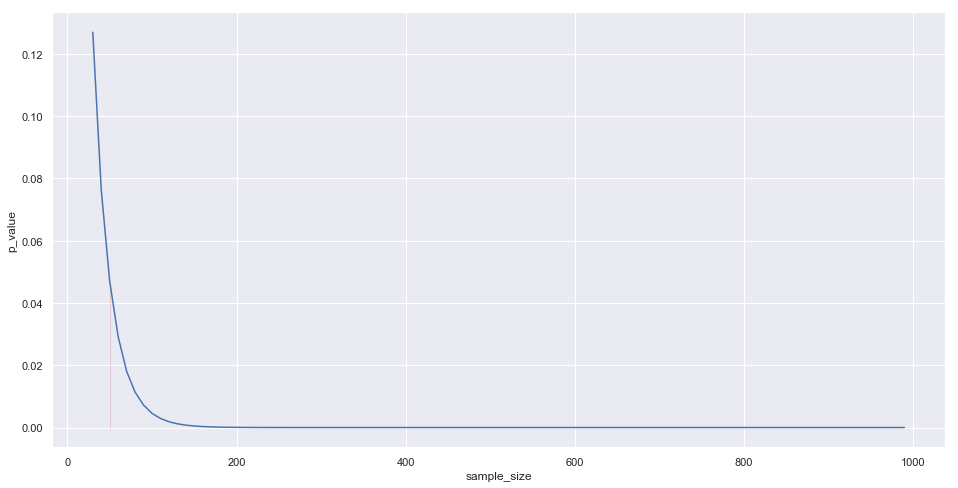

In [56]:
import matplotlib.pyplot as plt
# Seaborn のスタイルをセットする。
# sns.set() だけでもこぎれいになる。
# [参考] https://note.nkmk.me/python-matplotlib-seaborn-basic/
sns.set()
plt.figure(figsize=(16,8))
ax = sns.lineplot(x=[50,50], y=[4.697051e-02, 0], dashes=[(2, 2)], color="r", linestyle="--", alpha=1.0)
sns.lineplot(x='sample_size', y='p_value', data=df_plot_buff, ax=ax)  

In [55]:
%reload_ext autoreload